Plot SMA crossover graphs where fast moving average is the past 7 timestamps and slow moving average is the past 20 timestamps

Text(0, 0.5, 'SMA')

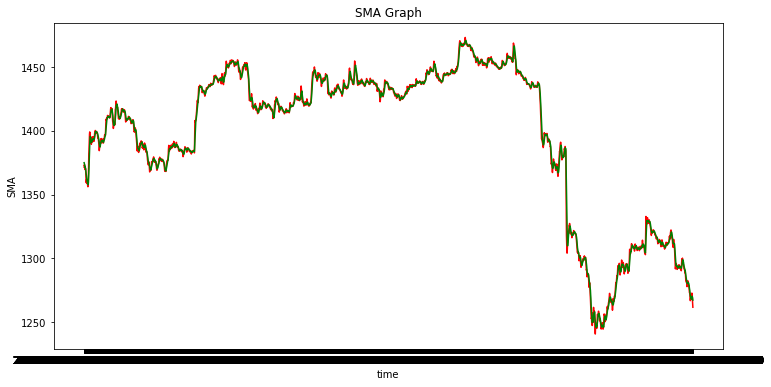

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('TATASTEEL - Sheet1.csv')
rows = df.shape[0]

time = df['timestamp']
closing_price = df['close']
fast_time = 7
slow_time = 20

def fast_movingAvg(index):
    average = np.sum(df.iloc[index-fast_time:index,5])/fast_time
    return average

def slow_movingAvg(index):
    average = np.sum(df.iloc[index-slow_time:index,5])/slow_time
    return average

i=slow_time
fast_avg= []
slow_avg= []
while i <= df.shape[0]:
    fast_avg.append(fast_movingAvg(i))
    slow_avg.append(slow_movingAvg(i))
    i=i+1

plt.figure(figsize=(12, 6))
plt.plot(df.iloc[slow_time-1:rows,1],fast_avg , color='r', label='fast SMA')
plt.plot(df.iloc[slow_time-1:rows,1],slow_avg , color='g', label='slow SMA')
plt.title('SMA Graph')
plt.xlabel('time')
plt.ylabel('SMA')

Buy the stock if the Closing Price of the present timestamp is GREATER than S1 AND the Closing Price of the present timestamp is GREATER than SMA of the past 20 timestamps. Sell the stock when the Closing Price of the present timestamp is LESSER than S1 AND the Closing Price of the present timestamp is LESSER than SMA of the past 20 timestamps. Refer to Pivot Point to know what S1 is. The very first order of the strategy should be Buy only, even if the Sell condition is met before the Buy condition. Calculate the profit or loss each time you sell, and display the total Profit/Loss of the entire backtest at the end.

In [10]:
def s1(index):
    p = np.mean(df.iloc[index,3:6])
    return p*2-df.iloc[index,3]

status = -1 
current_price = 0
total_profit = 0

def profit(index):
    global total_profit
    return df.iloc[index,5] - current_price
    
def buy(index):
    global status,current_price,total_profit
    status = 1
    current_price = df.iloc[index,5]

def sell(index):
    global status,current_price,total_profit
    status = 0
    total_profit = total_profit + profit(index)
    
i = 20
while i<= rows-1:

    if status == -1:
        if df.iloc[i,5] >= s1(i-1) and df.iloc[i,5] >= slow_movingAvg(i):
            buy(i)
            
    elif status == 0:
        if df.iloc[i,5] >= s1(i-1) and df.iloc[i,5] >= slow_movingAvg(i):
            buy(i)
            
    elif status == 1:
        if df.iloc[i,5] <= s1(i-1) and df.iloc[i,5] <= slow_movingAvg(i):
            sell(i)
            
    i=i+1

print('total profit = ') 
print(total_profit)

total profit = 
-150.09999999999923


As an extension to the previous strategy, apply a Profit Target and Stop Loss of 1% and 0.5% respectively. That means that as soon as the Portfolio value rises by 1% or lowers by 0.5% of the value you bought, you are supposed to square off the position even if the actual selling condition is not met.

In [11]:
status = -1 
current_price = 0
total_profit = 0
profit_target = 0.01
stop_loss = -0.005

i = 20
while i<= rows-1:

    if status == -1:
        if df.iloc[i,5] >= s1(i-1) and df.iloc[i,5] >= slow_movingAvg(i):
            buy(i)
            
    elif status == 0:
        if df.iloc[i,5] >= s1(i-1) and df.iloc[i,5] >= slow_movingAvg(i):
            buy(i)
            
    elif status == 1:
        if profit(i)/current_price >= profit_target:
            sell(i)
        elif profit(i)/current_price <= stop_loss:
            sell(i)
        elif df.iloc[i,5] <= s1(i-1) and df.iloc[i,5] <= slow_movingAvg(i):
            sell(i)
            
    i=i+1

print('total profit = ') 
print(total_profit)

total profit = 
-114.74999999999909


As a final modification, make sure you buy a position only after 9:25AM of a particular day and square off at 3:15PM of the same day.

In [12]:
status = -1 
current_price = 0
total_profit = 0
profit_target = 0.01
stop_loss = -0.005
market_open = True

i = 20
while i<= rows-1:
    
    curr_time = df.iloc[i,1][11:19]
    
    if curr_time == "15:15:00":
        market_open = False
        if status == 1:
            sell(i)
    elif curr_time == "09:25:00":
        market_open = True

    if market_open == True:
        if status == -1:
            if df.iloc[i,5] >= s1(i-1) and df.iloc[i,5] >= slow_movingAvg(i):
                buy(i)

        elif status == 0:
            if df.iloc[i,5] >= s1(i-1) and df.iloc[i,5] >= slow_movingAvg(i):
                buy(i)

        elif status == 1:
            if profit(i)/current_price >= profit_target:
                sell(i)
            elif profit(i)/current_price <= stop_loss:
                sell(i)
            elif df.iloc[i,5] <= s1(i-1) and df.iloc[i,5] <= slow_movingAvg(i):
                sell(i)

    i=i+1

print('total profit = ') 
print(total_profit)

total profit = 
-187.30000000000086
